In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [2]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data, header=None)

In [3]:
print(df.shape)
df.head()

(1728, 7)


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
for col in df.columns:
    print(df[col].value_counts()) 

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [7]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [8]:
# check missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [10]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [11]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [12]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(col_names)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
print(encoder.get_feature_names())

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']


In [13]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [14]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
y_pred_gini = clf_gini.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8021


In [18]:
y_pred_train_gini = clf_gini.predict(X_train)
print(y_pred_train_gini)

['unacc' 'unacc' 'unacc' ... 'unacc' 'unacc' 'acc']


In [19]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


In [20]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
y_test_pred = clf_gini.predict(X_test)
print('Test set score: {:.4f}'.format(accuracy_score(y_test_pred, y_test)))

Training set score: 0.7865
Test set score: 0.8021


unacc    397
acc      129
vgood     25
good      20
Name: class, dtype: int64


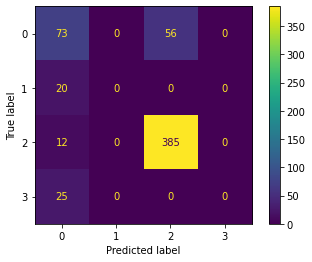

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(y_test.value_counts())
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [22]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

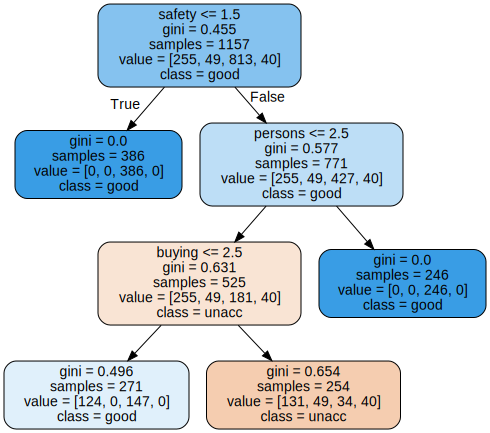

In [23]:
from sklearn import tree

#tree.plot_tree(clf_gini.fit(X_train, y_train))

from graphviz import Source
from sklearn.tree import export_graphviz

IMAGES_PATH = '/kaggle/working/'

export_graphviz(
        clf_gini,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=encoder.get_feature_names(),
        class_names=list(df['class'].value_counts().axes[0]),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [24]:
features = encoder.get_feature_names()
feature_max = {}
for feature in features:
    series = X_train[feature].value_counts()
    feature_max[feature] = series.size
feature_max['classes'] = y_train.value_counts().size
classes = list(y_train.value_counts().axes[0])
print(type(classes), classes)
print(feature_max)

<class 'list'> ['unacc', 'acc', 'good', 'vgood']
{'buying': 4, 'maint': 4, 'doors': 4, 'persons': 3, 'lug_boot': 3, 'safety': 3, 'classes': 4}


In [25]:
import copy
import random
random.seed(1)

class Node:
    def __init__(self, *args):
        if len(args) > 2 and isinstance(args[1], Node) and isinstance(args[2], Node):
            self.gen_offspring(args[0], args[1], args[2])
            return
        
        self.depth = args[0]
        self.max_depth = int(args[1])
        self.idx = random.randint(0, len(features)-1)
        self.attr = features[self.idx]
        self.cls = random.choice(classes)
        self.threshold = random.uniform(1, feature_max[self.attr])
        
        self.left = None
        self.right = None
        if self.depth >= self.max_depth:
            return
        
        if random.randint(1, 100) + 5*(self.max_depth - self.depth) <= 60: # 60% have this child 
            self.left = Node(self.depth+1, self.max_depth)
            self.right = Node(self.depth+1, self.max_depth)
                
    def __str__(self, child_side='root'):
        res = '\t'*self.depth + child_side
        res += ', ' + self.attr
        res += ', ' + self.cls
        res += ', ' + str(self.threshold) + '\n'
        if self.left != None:
            res += self.left.__str__('left')
        if self.right != None:
            res += self.right.__str__('right')
        return res
    
    def gen_offspring(self, depth, p1, p2):
        self.depth = depth
        self.max_depth = p1.max_depth
        
        if random.randint(0, 100) <= 80:
            self.idx = random.choice([p1.idx, p2.idx])
        else: self.idx = random.randint(0, len(features)-1)
        
        self.attr = features[self.idx]
        
        if random.randint(0, 100) <= 80:
            self.cls = random.choice([p1.cls, p2.cls])
        else: self.cls = random.choice(classes)
        
        if random.randint(0, 100) <= 80:
            self.threshold = (p1.threshold + p2.threshold) / 2
        else: self.threshold = random.uniform(1, feature_max[self.attr])
        
        self.left = None
        self.right = None
        
        if self.depth >= self.max_depth:
            return
        
        custom_child = random.randint(0, 100)
        if custom_child <= 40:
            if p1.left != None and p2.left != None:
                self.left = Node(self.depth+1, p1.left, p2.left)
            elif p1.left != None and p2.left == None:
                self.left = copy.deepcopy(p1.left)
            elif p1.left == None and p2.left != None:
                self.left = copy.deepcopy(p2.left)
                
            if p1.right != None and p2.right != None:
                self.right = Node(self.depth+1, p1.right, p2.right)
            elif p1.right != None and p2.right == None:
                self.right = copy.deepcopy(p1.right)
            elif p1.right == None and p2.right != None:
                self.right = copy.deepcopy(p2.right)
        elif custom_child <= 80: 
            self.left = Node(self.depth+1, self.max_depth)
            self.right = Node(self.depth+1, self.max_depth)
        
    def pred(self, x):
        if x[self.idx] >= self.threshold:
            if self.right != None:
                return self.right.pred(x)
            else: return self.cls
        else:
            if self.left != None:
                return self.left.pred(x)
            else: return self.cls
    
    def predict(self, X):
        if type(X).__module__ != np.__name__:
            X = np.asarray(X)
        
        if len(X.shape) != 2:
            print('require 2d array as input')
            return
        
        return [self.pred(X[i]) for i in range(X.shape[0])]

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

def eval_average_acc(tree, X, y):
    cls_cnt = y.value_counts().to_numpy()
    y_pred = tree.predict(X.to_numpy())
    cfmx = confusion_matrix(y, y_pred, labels=classes)
    propba = []
    for i in range(len(classes)):
        propba.append(cfmx[i][i] / cls_cnt[i])
        
    return sum(propba)/len(classes)

def eval_acc(tree, X, y):
    y_pred = tree.predict(X)
    return accuracy_score(y, y_pred)

def gen_population_and_eval(n):
    population = []
    for i in range(n):
        max_depth = int(len(features)*1.2)
        tree = Node(0, max_depth)
        aver_acc = eval_average_acc(tree, X_train, y_train)
        acc = eval_acc(tree, X_train, y_train)
        population.append((tree, aver_acc, acc))
    return population

In [27]:
n = 1000
selective = 100
iteration = 100
population = gen_population_and_eval(n)
for i in range(iteration):
    random.shuffle(population)
    step = 0
    offsprings = []
    while step+1 < len(population):
        offsp = Node(0, population[step][0], population[step+1][0])
        aver_acc = eval_average_acc(offsp, X_train, y_train)
        acc = eval_acc(offsp, X_train, y_train)
        offsprings.append((offsp, aver_acc, acc))
        step += 2
        
    population.extend(offsprings)
    population.extend(gen_population_and_eval(selective))
    population = sorted(population, key = lambda item: item[2], reverse=True)
    new_pop = population[:selective]
    population = sorted(population, key = lambda item: item[1], reverse=True)
    new_pop.extend(population[:selective])
    population = new_pop
    print(i, [acc for _, _, acc in population[:10]])

0 [0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813]
1 [0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813]
2 [0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813]
3 [0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813]
4 [0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.7026793431287813, 0.702

In [28]:
print([acc for _, _, acc in population])

[0.8003457216940363, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.766637856525497, 0.76663785

In [29]:
scores = []
for tree, _, _ in population:
    y_pred = tree.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
print(sorted(scores, reverse=True))

[0.8161120840630472, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228, 0.8003502626970228,

In [30]:
best_tree = population[0][0]
print(best_tree)

root, safety, acc, 1.6000530166457723
	left, safety, good, 2.027003277016086
		left, lug_boot, unacc, 2.4204511018809307
		right, maint, acc, 3.509314327018234
	right, persons, vgood, 2.0924142478368735
		left, buying, acc, 1.6662287960190922
			left, doors, unacc, 1.4807873813537538
			right, doors, acc, 1.1051458408833763
		right, safety, unacc, 2.0196670296296486



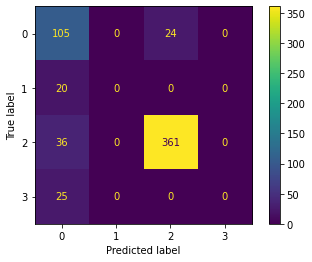

In [31]:
y_test_pred = best_tree.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [32]:
print('Test set score: {:.4f}'.format(accuracy_score(y_test_pred, y_test)))

Test set score: 0.8161
